In [33]:
import tensorflow as tlf
(X_train, y_train), (X_test, y_test) = tlf.keras.datasets.mnist.load_data()

1


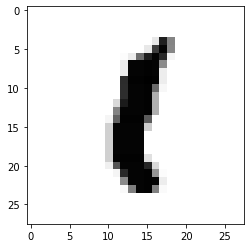

In [34]:
import matplotlib.pyplot as plt 
image_index = 7788
print(y_train[image_index])
plt.imshow(X_train[image_index], cmap = 'Greys')
plt.show()

In [35]:
X_train.shape

(60000, 28, 28)

In [36]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

input_type = (28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [37]:
X_train/=255
X_test/=255

In [38]:
print('x_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in X_train 60000
Number of images in X_test 10000


In [39]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size= (3,3), input_shape = input_type))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tlf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tlf.nn.softmax))

In [41]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2104 - accuracy: 0.9367
Epoch 2/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0856 - accuracy: 0.9740
Epoch 3/10
60000/60000 [==============================] - 59s 981us/step - loss: 0.0602 - accuracy: 0.9814
Epoch 4/10
60000/60000 [==============================] - 60s 997us/step - loss: 0.0448 - accuracy: 0.9855
Epoch 5/10
60000/60000 [==============================] - 59s 977us/step - loss: 0.0361 - accuracy: 0.9873s - l - E
Epoch 6/10
60000/60000 [==============================] - 58s 961us/step - loss: 0.0290 - accuracy: 0.9905
Epoch 7/10
60000/60000 [==============================] - 59s 979us/step - loss: 0.0247 - accuracy: 0.9912
Epoch 8/10
60000/60000 [==============================] - 58s 972us/step - loss: 0.0215 - accuracy: 0.9926
Epoch 9/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0203 - accuracy: 0.9933
Epoch 10/10
60000/60000 [=========

In [42]:

model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 279us/step


[0.062198704316043074, 0.9864000082015991]

0


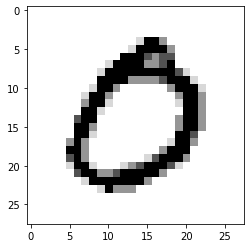

In [47]:
image_index = 4448
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())